## 앙상블 알고리즘

In [1]:
# data load
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
iris_x = iris.data
iris_y = iris.target

x_train, x_test, y_train, y_test = train_test_split(iris_x, iris_y, test_size = 0.2, random_state = 0)

## Bagging
### Random Forest
- 결정트리를 여러개 모아서 앙상블진행

In [3]:
from sklearn.ensemble import RandomForestClassifier

# 1) load model
clf = RandomForestClassifier()

# 2) Train model
clf.fit(x_train, y_train)

# 3) predict
clf.predict(x_test)

# 4) evaluation : accuracy
clf.score(x_test, y_test)

0.9666666666666667

In [ ]:
#  약 0/97 엄청 높은 정확도

#### 피쳐 중요도 (시각화)
- 어떤 피쳐가 중요하게 발동했는지 피쳐별 중요도를 추출해서 시각화

In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# featrue importance 추출
clf.feature_importances_

array([0.0889482 , 0.03484206, 0.462527  , 0.41368274])

In [5]:
# feature이름-각 feature별 importance mapping
for name, value in zip(iris.feature_names, clf.feature_importances_):
    print('{0} : {1: .3f}'.format(name, value))

sepal length (cm) :  0.089
sepal width (cm) :  0.035
petal length (cm) :  0.463
petal width (cm) :  0.414


Text(0.5, 1.0, 'Feature importances')

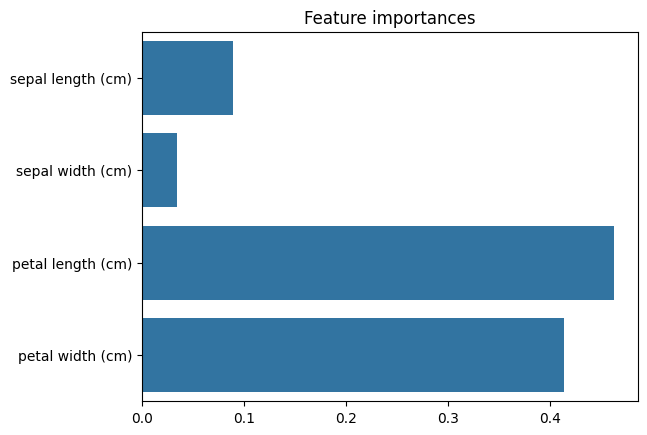

In [8]:
# feature importance시각화하기
sns.barplot(x = clf.feature_importances_, y=iris.feature_names)
plt.title('Feature importances')

In [ ]:
# petal length랑 petal width를 많이씀

## Boosting:  XGBoost

In [10]:
# pip install xgboost

In [11]:
from xgboost import XGBClassifier

# 1) load model
clf = XGBClassifier()

# 2) train model
clf.fit(x_train, y_train)

# 3) predict
clf.predict(x_test)

# 4) evaluation : accuracy
clf.score(x_test, y_test)

1.0

### 피쳐 중요도 시각화

In [12]:
# feature이름-각 feature별 importance mapping
for name, value in zip(iris.feature_names, clf.feature_importances_):
    print('{0} : {1: .3f}'.format(name, value))

sepal length (cm) :  0.014
sepal width (cm) :  0.015
petal length (cm) :  0.611
petal width (cm) :  0.361


Text(0.5, 1.0, 'Feature importances')

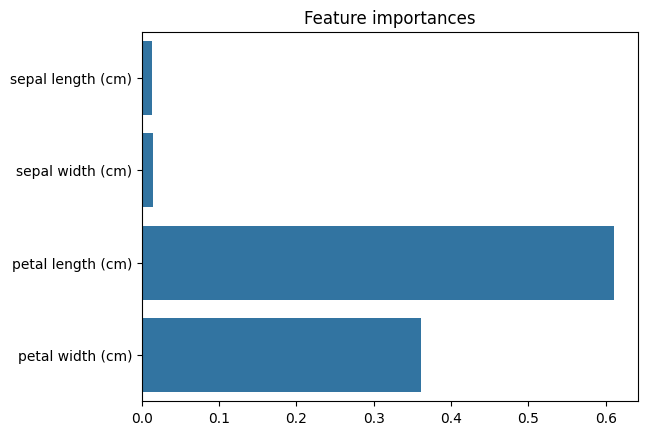

In [13]:
# feature importance시각화하기
sns.barplot(x = clf.feature_importances_, y=iris.feature_names)
plt.title('Feature importances')

In [ ]:
# Bagging(RandomForest)
# sepal length (cm) :  0.089
# sepal width (cm) :  0.035
# petal length (cm) :  0.463
# petal width (cm) :  0.414


# 부스팅
# sepal length (cm) :  0.014
# sepal width (cm) :  0.015
# petal length (cm) :  0.611
# petal width (cm) :  0.361